In [1]:
import json
from pathlib import Path
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyprojroot
import seaborn as sns
import toml
from tqdm import tqdm
# import vak

import article

In [2]:
RESULTS_ROOT = pyprojroot.here()  / 'results' / 'Bengalese_Finches' / 'behavior'

FIG_ROOT = pyprojroot.here() / 'doc' / 'figures' / 'mainfig_bf_behavior'

In [3]:
df_minsegdur_majvote = pd.read_csv(FIG_ROOT / 'fig6-data1.csv')

In [4]:
df_gr41rd51 = pd.read_csv(FIG_ROOT / 'fig6-data2.csv')

In [5]:
xyerr_json = FIG_ROOT / 'fig6-data3.json'

with xyerr_json.open('r') as fp:
    animal_xyerr = json.load(fp)

In [6]:
sns.set_style('white')
sns.set_context('paper')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

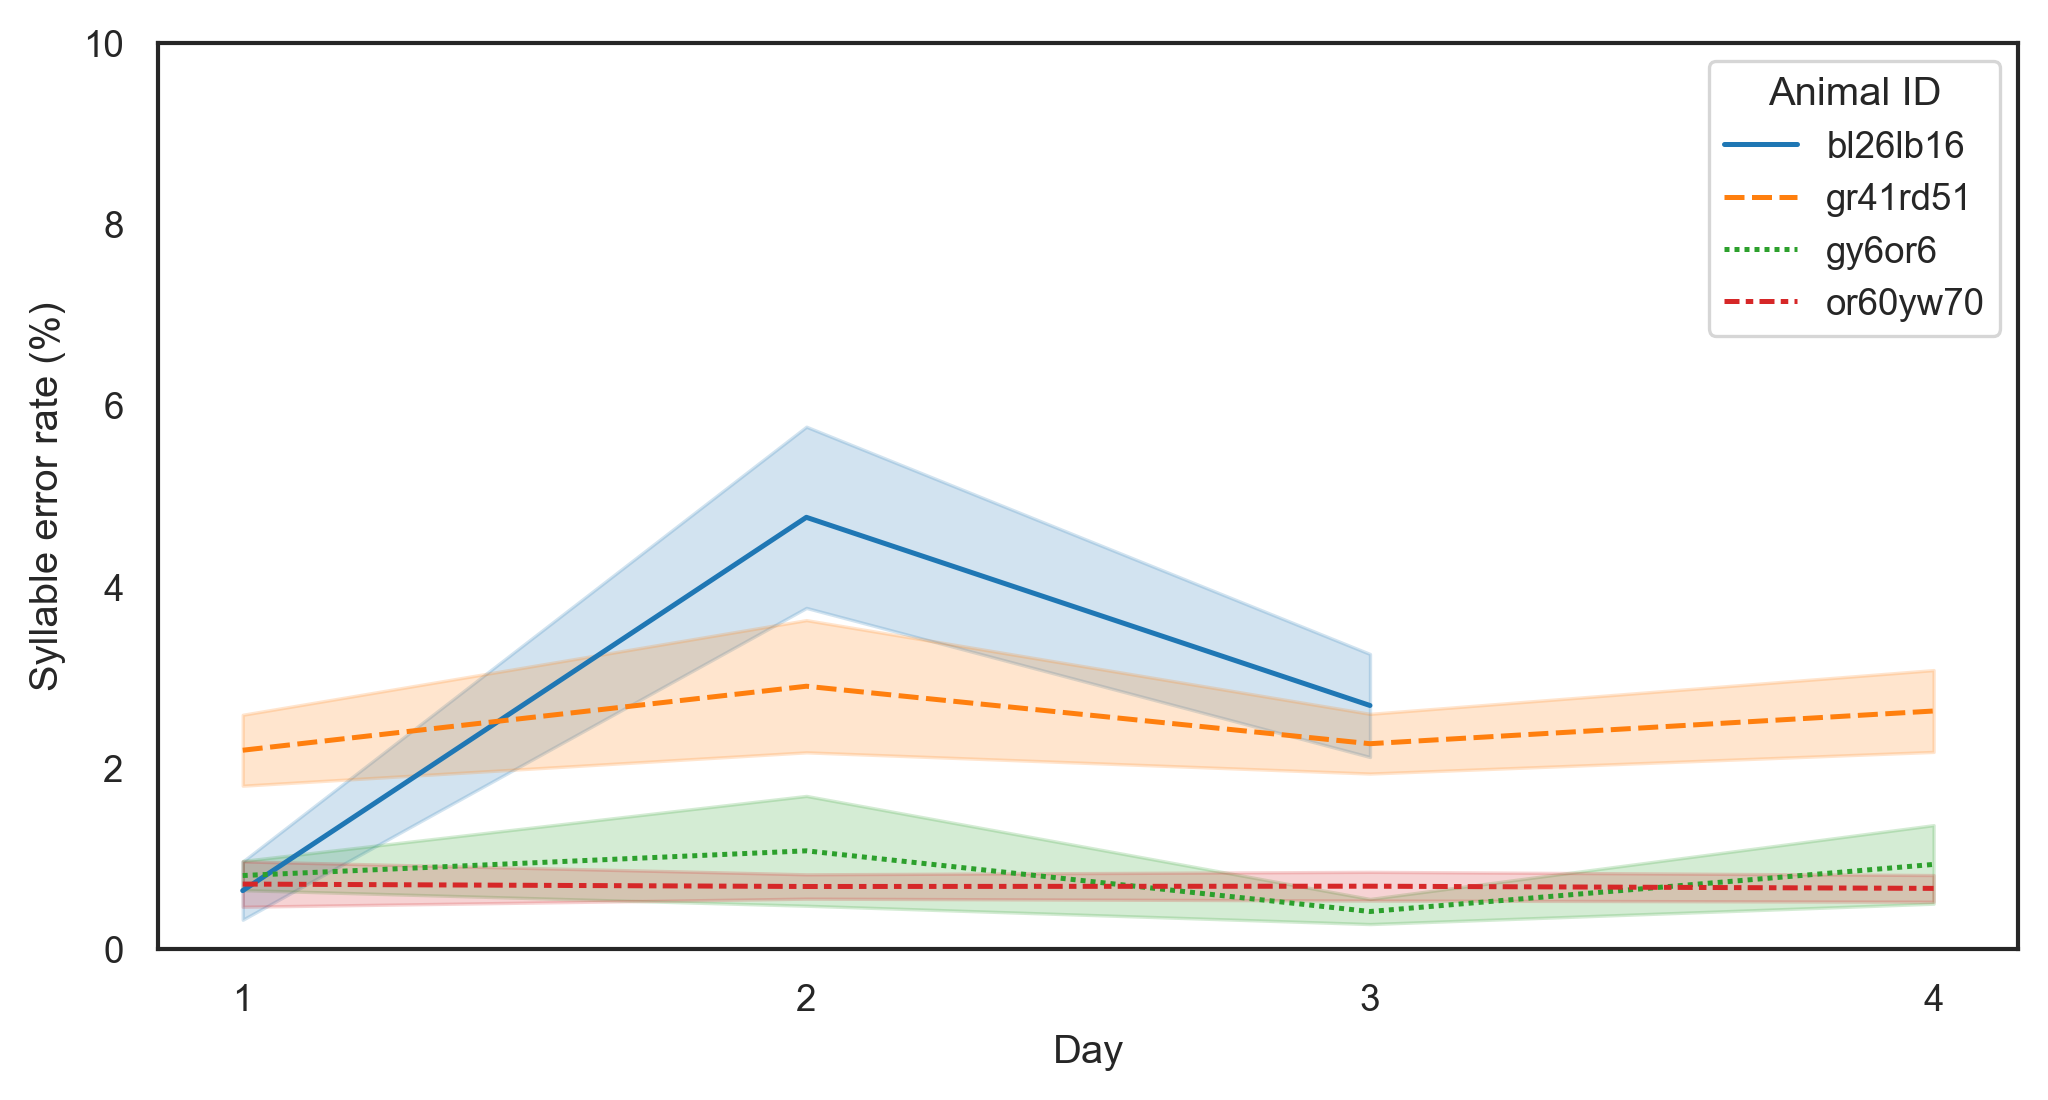

In [7]:
FIGSIZE = (8, 4)
DPI = 300

fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)
#gs = fig.add_gridspec(ncols=2, nrows=2)

# top_panel_ax = fig.add_subplot(gs[0, :])
# bottom_left_panel_ax = fig.add_subplot(gs[1, 0])
# bottom_right_panel_ax = fig.add_subplot(gs[1, 1])

# top panel
g = sns.lineplot(data=df_minsegdur_majvote, 
                x='day_int', y='avg_segment_error_rate',
                hue='animal_id', 
                style='animal_id',
                ci='sd',
                ax=ax
               )

g.legend_.set_title('Animal ID')

ax.set(xticks=[1, 2, 3, 4])
ax.set_ylim([0., 10])
ax.set_ylabel('Syllable error rate (%)')
ax.set_xlabel('Day');

FIG_STEM = 'syllable-error-rate-across-days'
    
for ext in ('eps', 'svg'):
    fig.savefig(FIG_ROOT / f'{FIG_STEM}.{ext}')

<ipython-input-8-83a1be155464>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  left_panel_ax.set_xticklabels(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be re

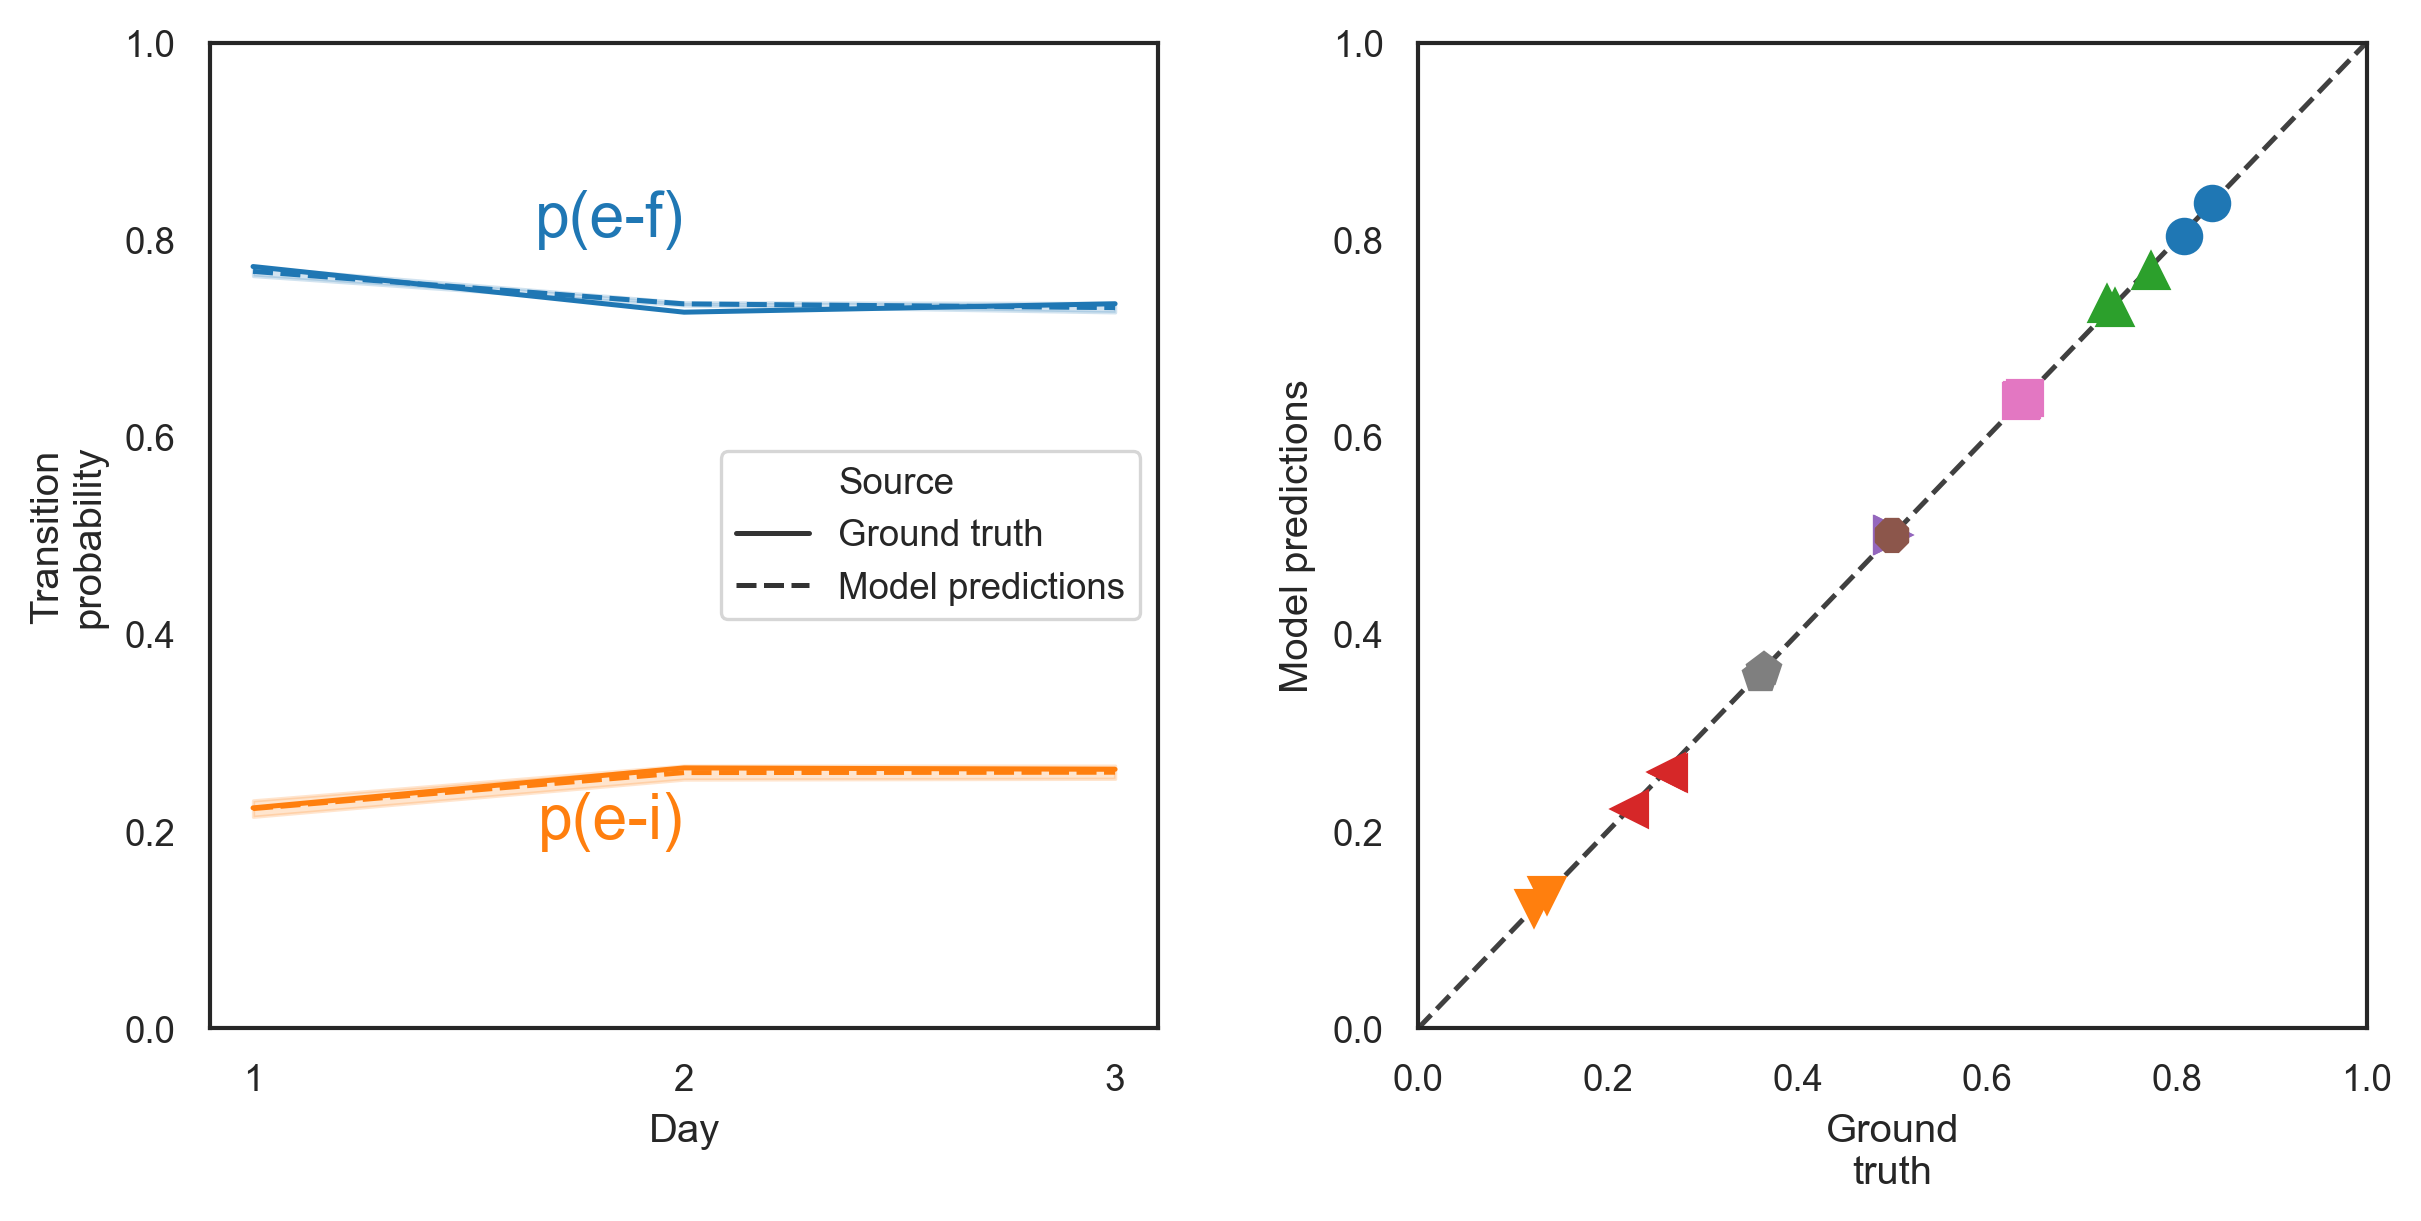

In [8]:
FIGSIZE = (8, 4)
DPI = 300

fig, ax_arr = plt.subplots(1, 2, 
                           figsize=FIGSIZE,
                           dpi=DPI,
                           constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=4 / 72, h_pad=4 / 72, hspace=0, wspace=0.1)

left_panel_ax, right_panel_ax = ax_arr[0], ax_arr[1]


g = sns.lineplot(
    data=df_gr41rd51,
    x='day',
    y='prob',
    hue='transition',
    style='Source',
    ci='sd',
    ax=left_panel_ax
)

handles, labels = left_panel_ax.get_legend_handles_labels()
source_handles, source_labels = handles[3:], labels[3:]  # just show "source" in legend
g.legend(
    source_handles,
    source_labels,
    loc='center right'
)

left_panel_ax.annotate('p(e-f)',
                       xy=(1.0, 0.79),
                       xycoords='data',
                       textcoords='data',
                       verticalalignment='bottom', 
                       horizontalalignment='right',
                       transform=ax.transAxes,
                       color=handles[1].get_color(), 
                       fontsize=15)

left_panel_ax.annotate('p(e-i)',
                       xy=(1.0, 0.18),
                       xycoords='data',
                       textcoords='data',
                       verticalalignment='bottom', 
                       horizontalalignment='right',
                       transform=ax.transAxes,
                       color=handles[2].get_color(), 
                       fontsize=15)

left_panel_ax.set_ylabel('Transition\nprobability')
left_panel_ax.set_xlabel('Day')

left_panel_ax.set_ylim([0., 1.])

xticklabels = left_panel_ax.get_xticklabels()
left_panel_ax.set_xticklabels(
    list(range(1, len(xticklabels) + 1))
)

MARKERS = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

for (animal_id_trans_tup, xyerr_dict), marker in zip(animal_xyerr.items(), MARKERS):
    x, y, yerr = xyerr_dict['x'], xyerr_dict['y'], xyerr_dict['yerr'],
    right_panel_ax.errorbar(x, y, yerr=yerr, fmt=marker, markersize=8)

# right_panel_ax.set_aspect('equal')
right_panel_ax.set_xlim([0., 1.0])
right_panel_ax.set_ylim([0., 1.0])
    
lims = [
    np.min([right_panel_ax.get_xlim(), right_panel_ax.get_ylim()]),  # min of both axes
    np.max([right_panel_ax.get_xlim(), right_panel_ax.get_ylim()]),  # max of both axes
]

right_panel_ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

right_panel_ax.set_xlabel('Ground\ntruth');
right_panel_ax.set_ylabel('Model predictions');

FIG_STEM = 'transition-probabilities-across-days'
    
for ext in ('eps', 'svg'):
    fig.savefig(FIG_ROOT / f'{FIG_STEM}.{ext}')